# Insurance data analysis
Based on "insurance" data set I will try to undertstand relations betweeen charges, region, age, sex, bmi and more among insured people.  

Will use libraries like :
- pandas
- seaborn
- matlplotib


- import pakietow
- wstpene zapoznanian
- analiza
- wnioski

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
insurance = pd.read_csv('insurance.csv')

##Preliminary data check

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe() #here I am checking main statistics in data set

# zrobić value counts dla wartości kategorycznych

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.select_dtypes(include=['object']).count()  # checking also categorical (object type)  data

sex       1338
smoker    1338
region    1338
dtype: int64

In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##Analysis - visualization

<ipython-input-13-a283636063a0>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.displot(x = 'age', data = insurance, hue = 'sex',


Text(0.5, 1.0, 'Distribution of the age depending on sex among insured people')

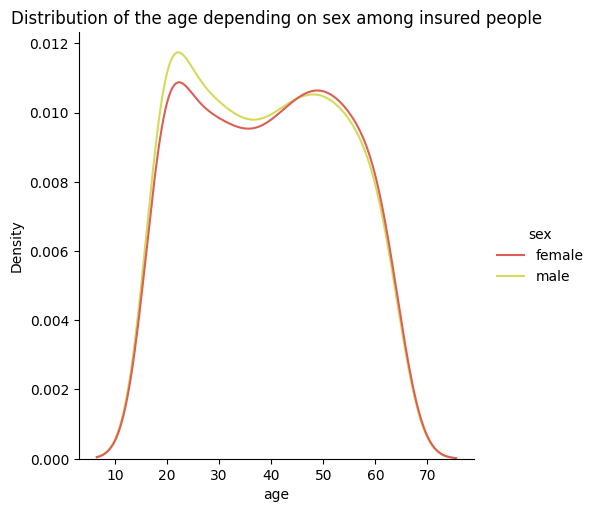

In [ ]:
sns.displot(x = 'age', data = insurance, hue = 'sex',
            palette = sns.color_palette('hls'),
            kind = 'kde',
            fill = False)

plt.title('Distribution of the age depending on sex among insured people')

Based on above chart we can see that our data are almost equal in split by sex.
Let's examine what is the relation between 'charges' and 'age'.

Text(0.5, 1.0, 'Relation between age and level of charges for male and female')

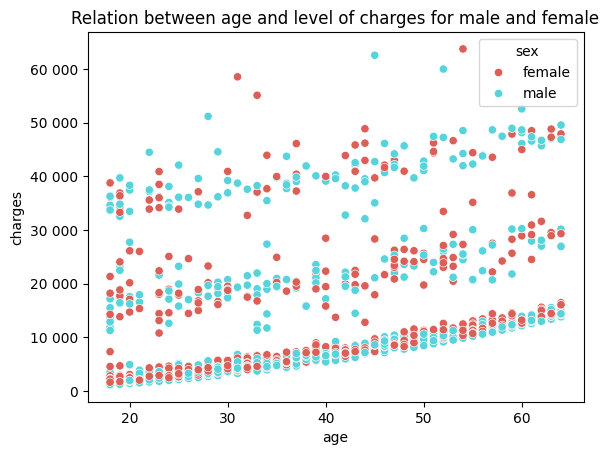

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data = insurance,
                palette = "hls",
                hue = 'sex',
                )

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Relation between age and level of charges for male and female')

We see three level of charges:
  - low <10 000
  - medium <10 000<30 000
  - high > 30 0000

  Let's **add new feature** which will classify charges as low, medium and high

In [3]:
charges_limits = [0,10000,30000,100000]
names = ['low charges', 'medium charges', 'high charges']
insurance['level of charges'] = pd.cut(insurance['charges'], bins=charges_limits, labels = names)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,level of charges
0,19,female,27.900,0,yes,southwest,16884.92400,medium charges
1,18,male,33.770,1,no,southeast,1725.55230,low charges
2,28,male,33.000,3,no,southeast,4449.46200,low charges
3,33,male,22.705,0,no,northwest,21984.47061,medium charges
4,32,male,28.880,0,no,northwest,3866.85520,low charges


<ipython-input-4-295171ecc40a>:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(x = 'age', data = insurance, hue = 'level of charges',


Text(0.5, 1.0, 'Distribution of level of charges depending on age among insured people')

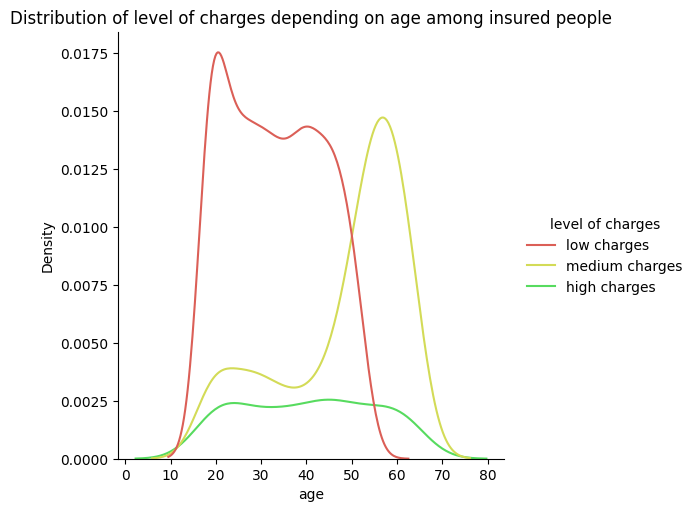

In [4]:
sns.displot(x = 'age', data = insurance, hue = 'level of charges',
            palette = sns.color_palette('hls'),
            kind = 'kde',
            fill = False)


plt.title('Distribution of level of charges depending on age among insured people')

Let's examine impact of region on charges:



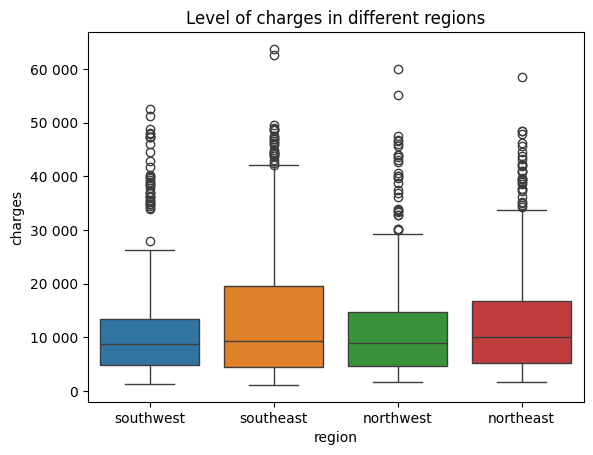

In [5]:
df_region = pd.DataFrame(insurance[['charges', 'region']])

# Create plot_1 (boxplot)
plot_1 = sns.boxplot(x='region', y='charges', data=df_region, hue='region')
plot_1.set_title('Level of charges in different regions')

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


We may notice that in all regions there is similar distribution of insured people wih almost the same median on level close to 10 000.  
Let's now check if there is any correlation between main features.

dodać **test statystyczny Anova**

<ipython-input-19-4b8e838c2154>:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.displot(x = 'age', data = insurance, hue = 'region',


Text(0.5, 1.0, 'Distribution in different region depending on age among insured people')

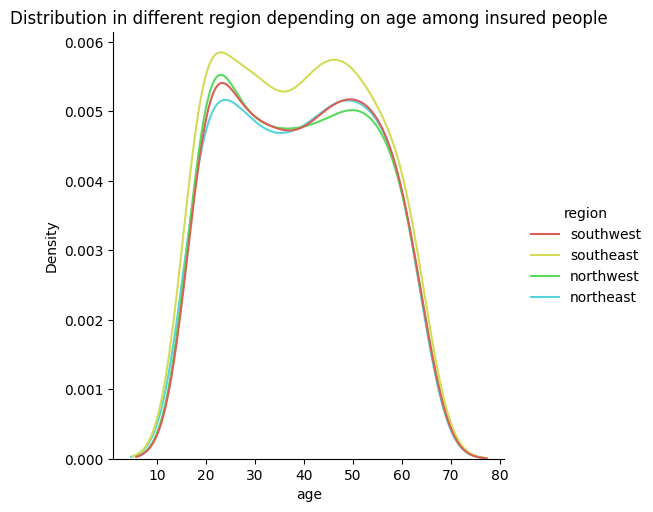

In [ ]:
sns.displot(x = 'age', data = insurance, hue = 'region',
            palette = sns.color_palette('hls'),
            kind = 'kde',
            fill = False)


plt.title('Distribution in different region depending on age among insured people')

In [ ]:
insurance_corr = insurance[['age','bmi','children','charges']].corr()

<Axes: >

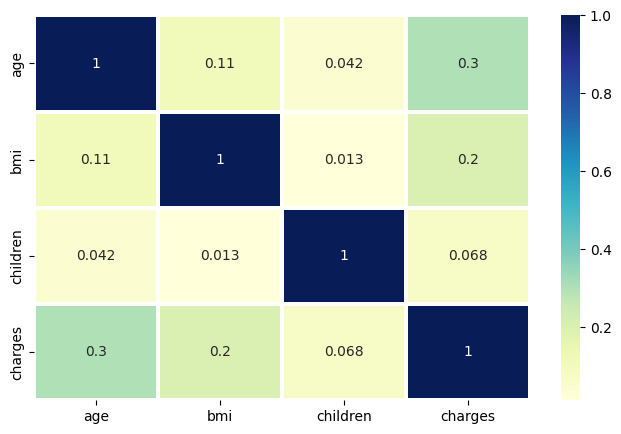

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(insurance_corr,
            annot=True,  #dodawanie annotacji (tekstu)
            linewidths=1.5,  #szerokość przerw między kafelkami
            cmap="YlGnBu")  #zmiana palety kolorów

In general there is no significant correlation between age, bmi, no of childres and charges.

However, let's verify what is the correlation in previously defined group for particular level of charges.


In [9]:
insurance_low_charges = insurance.loc[insurance['level of charges'] == 'low charges']
insurance_corr_low_charges = insurance_low_charges[['age','bmi','children','charges']].corr()

insurance_medium_charges = insurance.loc[insurance['level of charges'] == 'medium charges']
insurance_corr_medium_charges = insurance_medium_charges[['age','bmi','children','charges']].corr()

insurance_high_charges = insurance.loc[insurance['level of charges'] == 'high charges']
insurance_corr_high_charges = insurance_high_charges[['age','bmi','children','charges']].corr()

Text(0.5, 1.0, 'High Charges')

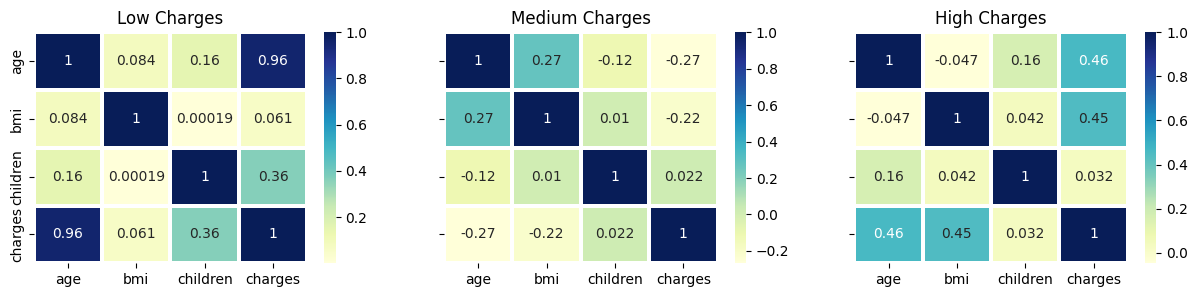

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3))


sns.heatmap(insurance_corr_low_charges, annot=True, linewidths=1.5, cmap="YlGnBu", ax=ax[0])
sns.heatmap(insurance_corr_medium_charges, annot=True, linewidths=1.5, cmap="YlGnBu", ax=ax[1])
sns.heatmap(insurance_corr_high_charges, annot=True, linewidths=1.5, cmap="YlGnBu", ax=ax[2])


ax[0].set_title('Low Charges')
ax[1].set_title('Medium Charges')
ax[2].set_title('High Charges')


Based on above figures we see high correlation between age and charges only in "Low charges" group of data.  

Let's now verify what is the impact of number of children among insured people

In [24]:
children_summary = insurance.pivot_table(index='children', aggfunc='size')

children_summary = children_summary.reset_index(name='Counts')
children_summary['Percentage'] = (children_summary['Counts'] / len(insurance)) * 100

print(children_summary)

   children  Counts  Percentage
0         0     574   42.899851
1         1     324   24.215247
2         2     240   17.937220
3         3     157   11.733931
4         4      25    1.868460
5         5      18    1.345291


We see that almost 43% of insured people in this data have no children.   

Let's check what is mean of charges for different sex.

In [25]:
pivot_table = pd.pivot_table(insurance, values='charges', index='children', columns='sex', aggfunc='mean')
print(pivot_table)

sex             female          male
children                            
0         11905.714276  12832.696736
1         12161.360414  13273.522458
2         13941.317326  16187.095325
3         13865.605066  16789.167419
4         13937.674562  13782.284829
5          9854.006419   7931.658310


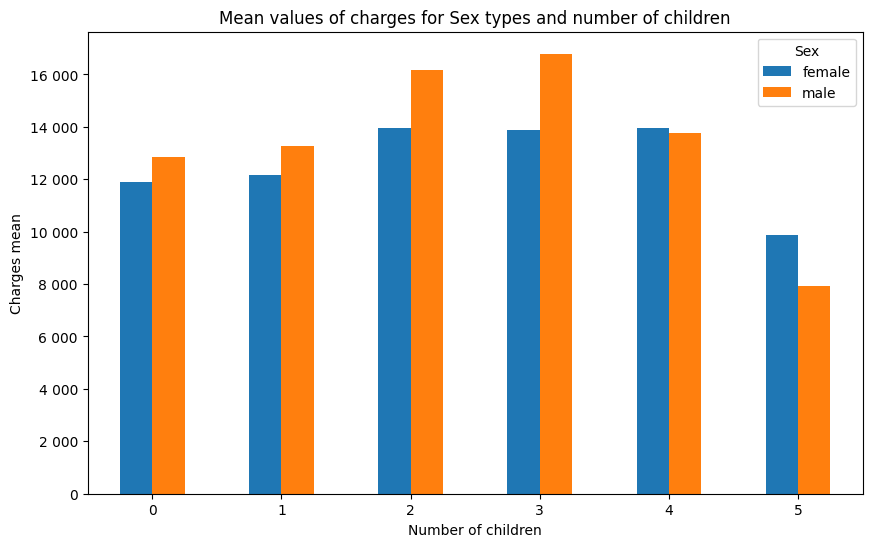

In [36]:
pivot_table = insurance.pivot_table(index='children', columns='sex', values='charges', aggfunc='mean')

ax = pivot_table.plot(kind='bar', figsize=(10, 6))

plt.title('Mean values of charges for Sex types and number of children')
plt.xlabel('Number of children')
plt.ylabel('Charges mean')
plt.legend(title='Sex')

ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

It shows that charges for male are higher than for women for having max 3 children, but above 4 children it looks like charges are higher for women. However  knowing that our data set includes in total only ~3% with no of children > 4, we may only assume about such statement.  

Now, let's look into impact of bmi, let's create certain levels of bmi.



In [39]:
bmi_limits = [0,18.5,25,30,40,1000]
names = ['underweight', 'healthy_range', 'overweigt', 'obesity','severe obesity']
insurance['bmi category'] = pd.cut(insurance['bmi'], bins=bmi_limits, labels = names)

<ipython-input-41-77f3b7fb6796>:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.displot(x = 'age', data = insurance, hue = 'bmi category',


Text(0.5, 1.0, 'Distribution of the age depending on sex among insured people')

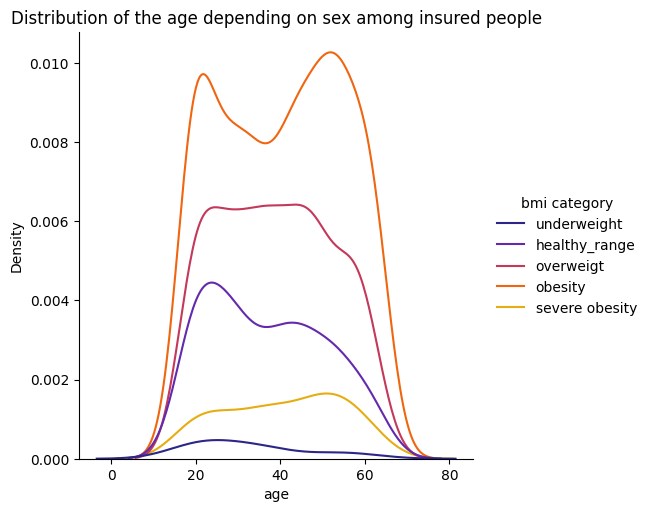

In [41]:
sns.displot(x = 'age', data = insurance, hue = 'bmi category',
            palette = sns.color_palette('CMRmap'),
            kind = 'kde',
            fill = False)

plt.title('Distribution of the age depending on sex among insured people')

Based on above figure it looks like most of insured people have obesity. Let's check if bmi has impact on level of charges.

In [42]:
charges_for_bmi = insurance.groupby('level of charges')['bmi category'].value_counts().unstack(fill_value=0)
charges_for_bmi = charges_for_bmi .rename(columns={True: 'Count'})
print(charges_for_bmi)

bmi category      underweight  healthy_range  overweigt  obesity  \
level of charges                                                   
low charges                14            128        217      305   
medium charges              6             96        159      181   
high charges                1              2         10      128   

bmi category      severe obesity  
level of charges                  
low charges                   48  
medium charges                22  
high charges                  21  


In [43]:
charges_for_smokers = insurance.groupby('level of charges')['smoker'].value_counts().unstack(fill_value=0)
charges_for_smokers = charges_for_smokers.rename(columns={True: 'Count'})
print(charges_for_smokers)

smoker             no  yes
level of charges          
low charges       712    0
medium charges    342  122
high charges       10  152


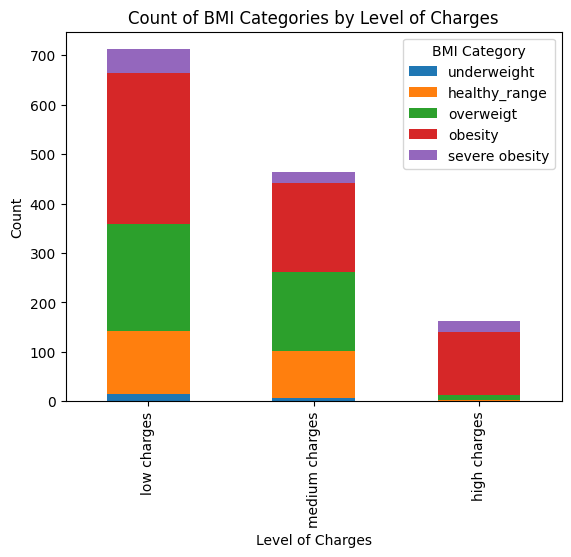

In [48]:
charges_for_bmi.plot(kind='bar', stacked=True)

# Konfiguracja wykresu
plt.xlabel('Level of Charges')
plt.ylabel('Count')
plt.title('Count of BMI Categories by Level of Charges')
plt.legend(title='BMI Category')
plt.show()

We may assume that "healthy" range of bmi corresponds to low and medium charges, wile obesity and overweight is visible in all level of charges.

In next step let's investigate how **smoking** affects insured people.

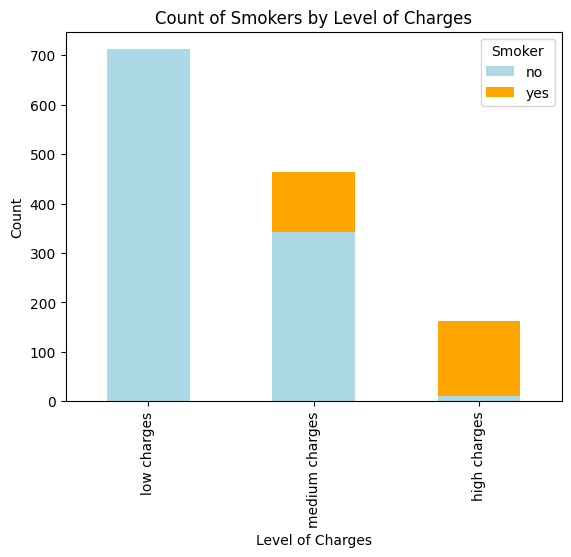

In [49]:
charges_for_smokers.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])

# Konfiguracja wykresu
plt.xlabel('Level of Charges')
plt.ylabel('Count')
plt.title('Count of Smokers by Level of Charges')
plt.legend(title='Smoker')

# Pokaż wykres
plt.show()

We may state that smokers paing higher charges for insurance.  

As last step let's check how looks distribution of number of children depending on age  among insured people

Text(0.5, 1.0, 'Distribution of the number of children depending on age  among insured people')

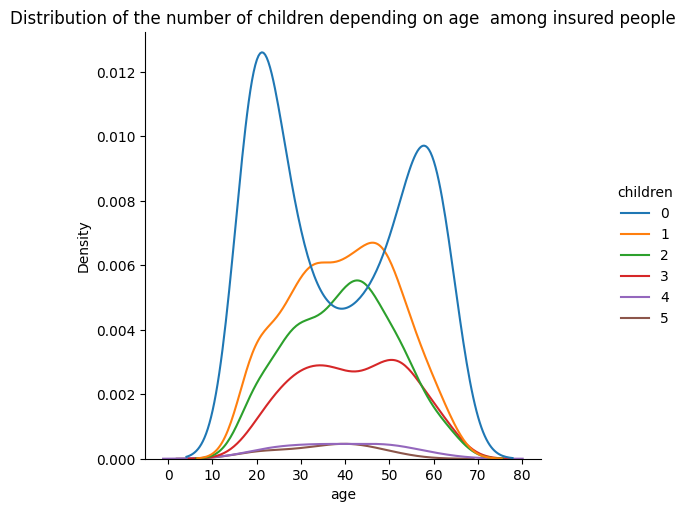

In [ ]:
sns.displot(x = 'age', data = insurance, hue = 'children', palette = "tab10", kind = 'kde', fill = False)

plt.title('Distribution of the number of children depending on age  among insured people')

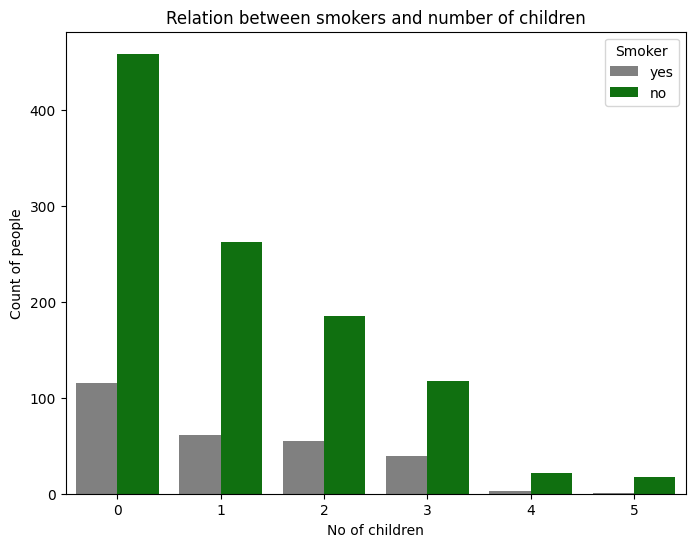

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=insurance, x='children', hue='smoker', palette={'yes': 'gray', 'no': 'green'})
plt.title('Relation between smokers and number of children')
plt.xlabel('No of children')
plt.ylabel('Count of people')
plt.legend(title='Smoker')
plt.show()

Dodac podsumowanie
- czy mozna zrobić model regresyjny
- czy warto poszukać dodatkowych zbiorów danych
- generalnie co można dalej zrobić z danymi

##Summary

-  for further analysis it could be useful to find similar dataset with more features like education, level of income, type of activities for insured people
- with this dataset we could try to build prediction model (for example to predict value of charges),but due to the fact that total number of samples it is not so high plus there may be many more factors which may have impact on insurance level